<a href="https://colab.research.google.com/github/EmanoneL/data_analysis_pet_project/blob/main/factor%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install factor-analyzer

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import kstest # Критерий Колмогорова-Смирнова
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from factor_analyzer import Rotator

Этот набор данных содержит около 20 функций, которые оказывают наибольшее влияние на стресс студента. Характеристики выбираются с научной точки зрения с учетом 5 основных факторов: психологических, физиологических, социальных, экологических и академических факторов. <br>
Некоторые из них:<br>
Психологические факторы => 'уровень_тревоги', 'самооценка', 'история_психического_здоровья', 'депрессия',
<br><br>
Физиологические факторы => «головная боль», «кровяное_давление», «качество_сна», «проблема_дыхания».
<br><br>
Факторы окружающей среды => 'уровень_шума', 'условия_жизни', 'безопасность', 'основные_потребности',
<br><br>
Академические факторы => 'академическая_эффективность', 'учебная_нагрузка', 'учитель_студент_отношения', 'будущая_карьера_проблемы',
<br><br>
Социальный фактор => 'социальная_поддержка', 'давление_сверстников', 'внеклассная_деятельность', 'запугивание'

In [ ]:
# Проверяет близость к нормальному распределению для фичи по критерию Колмогорова-Смирнова
def checkStandart(df, feature_name):
  data = (df[feature_name] - df[feature_name].mean()) / df[feature_name].std()

  # Выполняем K-S тест для проверки нормальности
  stat, p_value = kstest(data, 'norm')
  print(f'Statistic: {stat}, p-value: {p_value}')

  # Интерпретация результата
  alpha = 0.05
  if p_value > alpha:
      print(f'Распределение {feature_name} близко к нормальному (не отклоняем H0)')
  else:
      print(f'Распределение {feature_name} отличается от нормального (отклоняем H0)')

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("rxnach/student-stress-factors-a-comprehensive-analysis") + 'student-stress-factors-a-comprehensive-analysis.csv'
path = r'/root/.cache/kagglehub/datasets/rxnach/student-stress-factors-a-comprehensive-analysis/versions/1/StressLevelDataset.csv'

In [ ]:
data = pd.read_csv(path)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [ ]:
data.head(10)

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1
5,20,13,1,21,3,3,1,4,3,2,...,1,2,5,2,5,1,4,4,5,2
6,4,26,0,6,1,2,4,1,1,4,...,4,5,1,4,1,3,2,2,1,0
7,17,3,1,22,4,3,1,5,3,1,...,1,1,3,2,4,1,4,4,5,2
8,13,22,1,12,3,1,2,4,3,3,...,3,3,3,2,3,3,3,2,2,1
9,6,8,0,27,4,3,1,2,0,5,...,2,2,2,1,5,1,5,3,4,1


In [ ]:
data.describe()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
count,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,...,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000,1100.000000
mean,11.063636,17.777273,0.492727,12.555455,2.508182,2.181818,2.660000,2.753636,2.649091,2.518182,...,2.772727,2.772727,2.621818,2.648182,2.649091,1.881818,2.734545,2.767273,2.617273,0.996364
std,6.117558,8.944599,0.500175,7.727008,1.409356,0.833575,1.548383,1.400713,1.328127,1.119208,...,1.433761,1.414594,1.315781,1.384579,1.529375,1.047826,1.425265,1.417562,1.530958,0.821673
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.000000,11.000000,0.000000,6.000000,1.000000,1.000000,1.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,2.000000,1.000000,0.000000
50%,11.000000,19.000000,0.000000,12.000000,3.000000,2.000000,2.500000,3.000000,3.000000,2.000000,...,3.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.500000,3.000000,1.000000
75%,16.000000,26.000000,1.000000,19.000000,3.000000,3.000000,4.000000,4.000000,3.000000,3.000000,...,4.000000,4.000000,3.000000,4.000000,4.000000,3.000000,4.000000,4.000000,4.000000,2.000000
max,21.000000,30.000000,1.000000,27.000000,5.000000,3.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,5.000000,5.000000,5.000000,2.000000


array([[<Axes: title={'center': 'anxiety_level'}>,
        <Axes: title={'center': 'self_esteem'}>,
        <Axes: title={'center': 'mental_health_history'}>,
        <Axes: title={'center': 'depression'}>,
        <Axes: title={'center': 'headache'}>],
       [<Axes: title={'center': 'blood_pressure'}>,
        <Axes: title={'center': 'sleep_quality'}>,
        <Axes: title={'center': 'breathing_problem'}>,
        <Axes: title={'center': 'noise_level'}>,
        <Axes: title={'center': 'living_conditions'}>],
       [<Axes: title={'center': 'safety'}>,
        <Axes: title={'center': 'basic_needs'}>,
        <Axes: title={'center': 'academic_performance'}>,
        <Axes: title={'center': 'study_load'}>,
        <Axes: title={'center': 'teacher_student_relationship'}>],
       [<Axes: title={'center': 'future_career_concerns'}>,
        <Axes: title={'center': 'social_support'}>,
        <Axes: title={'center': 'peer_pressure'}>,
        <Axes: title={'center': 'extracurricular_activ

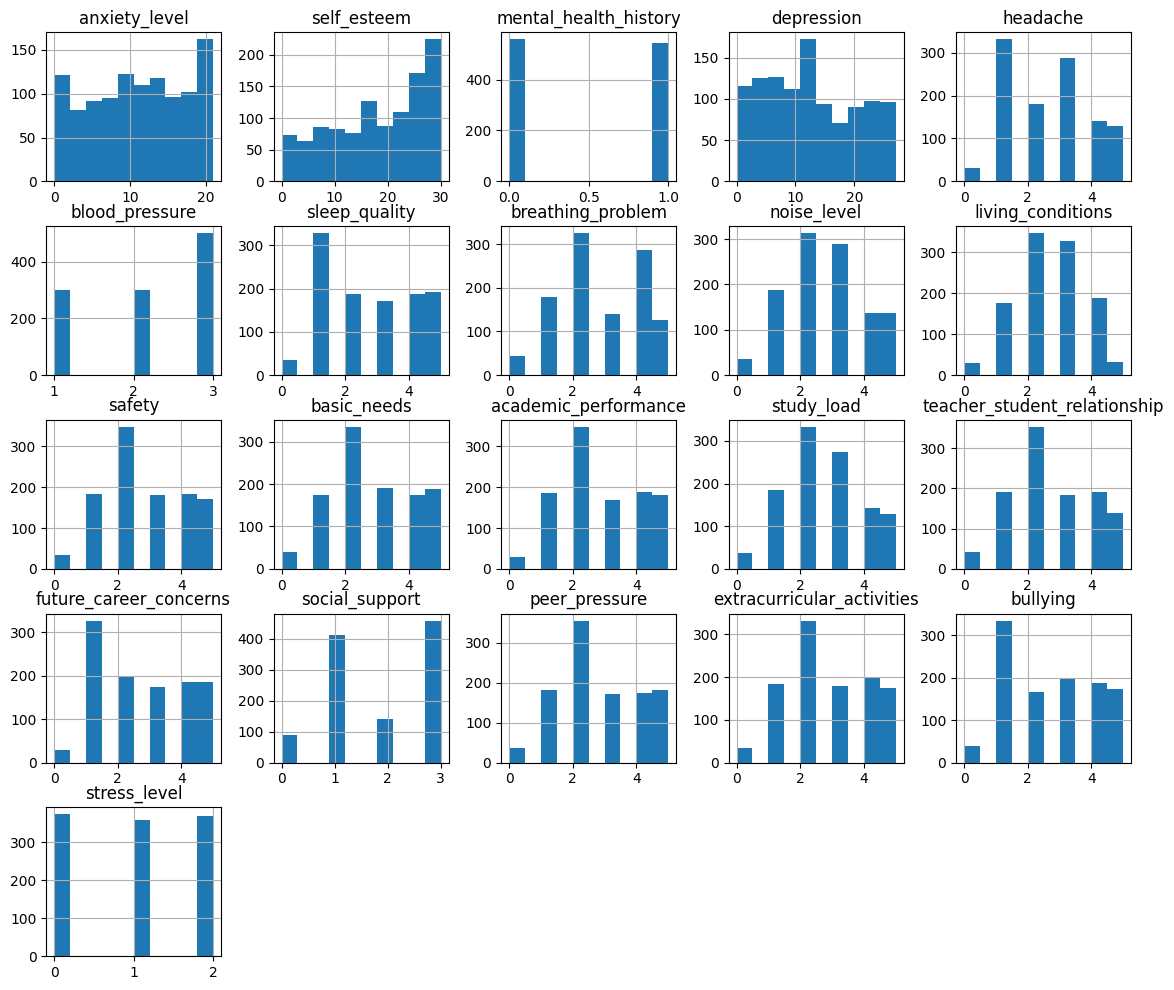

In [ ]:
data.hist(figsize=(14,12))

In [ ]:
for feature_name in data.columns.tolist():
  print(data.value_counts(feature_name), '\n')

anxiety_level
13    67
10    63
21    61
19    61
9     60
12    56
18    55
11    54
6     52
7     51
14    51
15    51
3     48
17    47
1     46
2     46
16    45
8     44
5     40
20    40
4     33
0     29
Name: count, dtype: int64 

self_esteem
25    83
30    60
27    59
26    58
28    53
29    52
15    50
23    45
17    40
21    38
11    37
16    37
20    36
13    32
6     31
24    30
7     28
19    28
1     28
22    27
8     26
9     25
3     25
18    24
0     24
12    23
14    21
10    21
2     21
5     19
4     19
Name: count, dtype: int64 

mental_health_history
0    558
1    542
Name: count, dtype: int64 

depression
10    66
13    63
12    63
14    57
8     49
3     47
11    46
9     46
0     44
5     43
7     42
18    41
2     36
1     36
6     36
22    36
27    36
4     35
24    34
20    33
26    33
17    30
19    29
21    28
23    27
25    27
15    21
16    16
Name: count, dtype: int64 

headache
1    331
3    287
2    181
4    140
5    129
0     32
Name: count, dtype:

Скорее всего категориальные переменные:

In [ ]:
for feature_name in data.columns.tolist():
  checkStandart(data, feature_name)
  print('\n')

Statistic: 0.07407174940236805, p-value: 1.076508864118584e-05
Распределение anxiety_level отличается от нормального (отклоняем H0)


Statistic: 0.1221277704269097, p-value: 9.334872837093525e-15
Распределение self_esteem отличается от нормального (отклоняем H0)


Statistic: 0.3449878844413018, p-value: 1.9579851413962085e-117
Распределение mental_health_history отличается от нормального (отклоняем H0)


Statistic: 0.07039632415180419, p-value: 3.47929524280496e-05
Распределение depression отличается от нормального (отклоняем H0)


Statistic: 0.1877176412212604, p-value: 2.0716301583778424e-34
Распределение headache отличается от нормального (отклоняем H0)


Statistic: 0.291380728659389, p-value: 3.2156577250022518e-83
Распределение blood_pressure отличается от нормального (отклоняем H0)


Statistic: 0.1872503087229827, p-value: 3.065745270144514e-34
Распределение sleep_quality отличается от нормального (отклоняем H0)


Statistic: 0.20199717062344663, p-value: 8.006692372724e-40
Распре

In [ ]:
# This scales each column to have mean=0 and standard deviation=1
SS=StandardScaler()

# Apply scaling
standart_data=pd.DataFrame(SS.fit_transform(data), columns=data.columns)

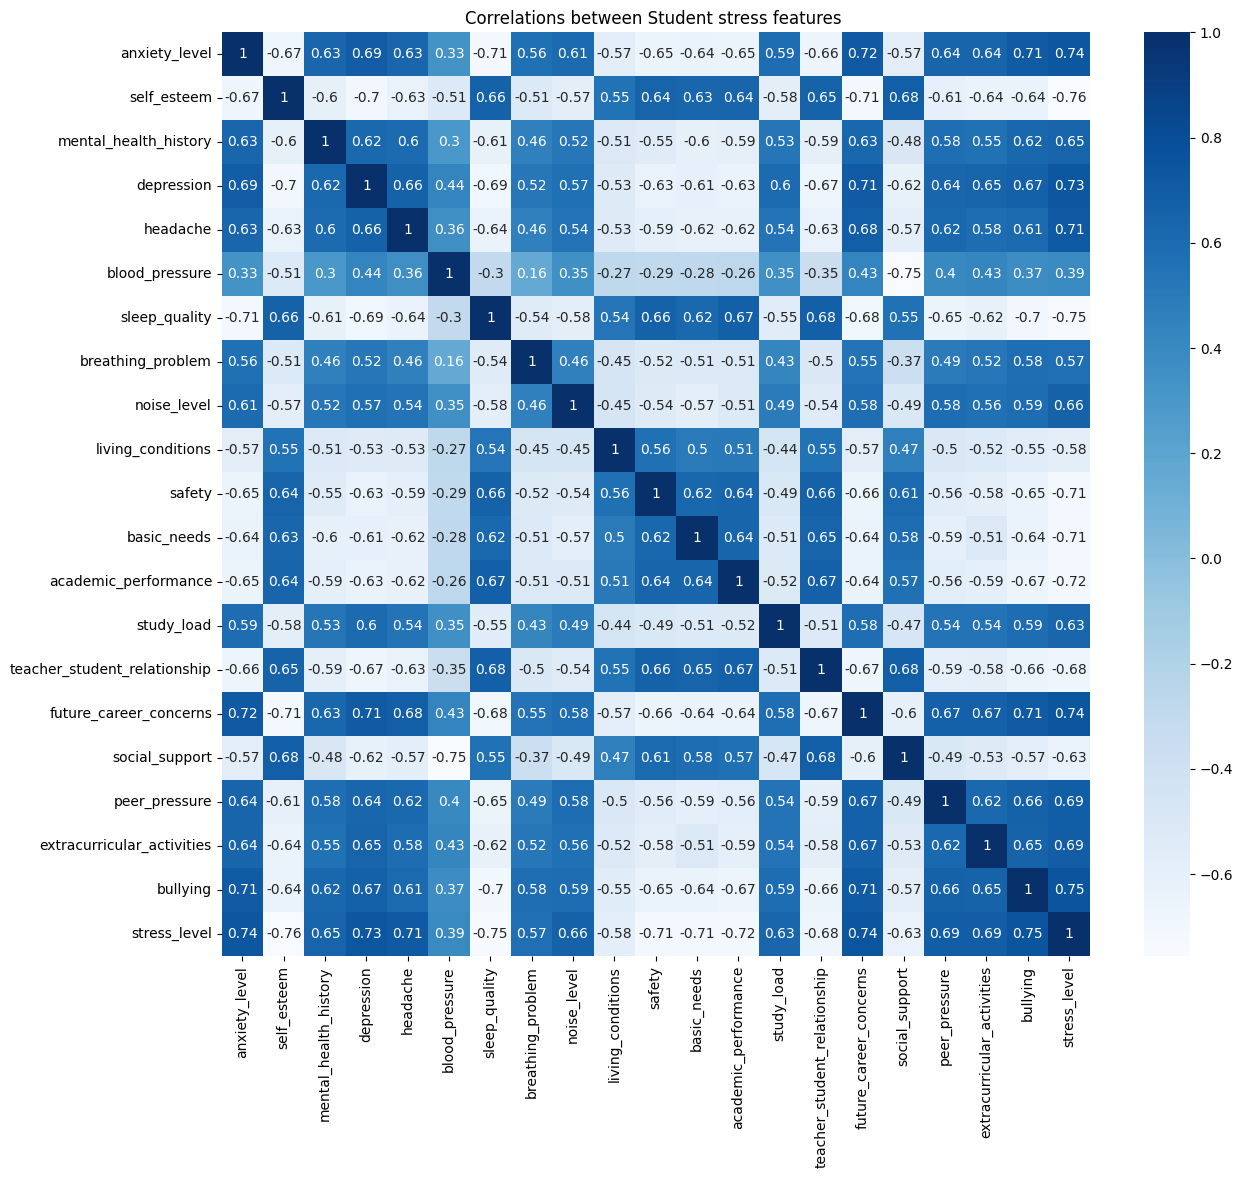

In [ ]:
correlation_matrix = standart_data.corr()
plt.figure(figsize=(14,12))
sns.heatmap(correlation_matrix,annot=True,cmap='Blues')
plt.title('Correlations between Student stress features ')
plt.show()

На основании данной корреляционной матрицы можно предположить наличие возможных скрытых факторов, таких как
<br>
1. Психологический фактор:
Переменные, такие как anxiety_level, depression, self_esteem, mental_health_history, и stress_level, имеют высокую корреляцию между собой (от ~0.6 до 0.7). Это может указывать на общий скрытый фактор, связанный с психологическим состоянием студентов.
<br>
2. Физическое здоровье:
Переменные, такие как headache, blood_pressure, sleep_quality, и breathing_problem, демонстрируют взаимосвязь (хотя и более умеренную, ~0.4–0.6). Это может указывать на скрытый фактор, связанный с физическим состоянием или здоровьем.
<br>
3. Социальная поддержка и окружение:
Корреляция между teacher_student_relationship, social_support, peer_pressure, и bullying (~0.5–0.7) предполагает влияние социального окружения и уровня поддержки на общее состояние.
<br>
4. Учебная нагрузка и карьерные перспективы:
Переменные study_load, academic_performance, и future_career_concerns коррелируют друг с другом (~0.5–0.7). Это может указывать на фактор, связанный с учебной деятельностью и карьерным стрессом.
<br>
5. Условия проживания и базовые потребности:
living_conditions, basic_needs, и safety имеют умеренную взаимосвязь (~0.5–0.6), что указывает на важность факторов, связанных с условиями жизни.

In [ ]:
# # Устанавливаем порог корреляции
# threshold = 0.75

# # Получаем матрицу признаков с абсолютными значениями корреляции
# corr_matrix = correlation_matrix.abs()

# # Выбираем только те признаки, у которых корреляция превышает порог, и это не сам с собой (по диагонали)
# high_corr_pairs = [(i, j) for i in corr_matrix.columns for j in corr_matrix.columns
#                    if i != j and corr_matrix.loc[i, j] > threshold]
# # Находим признаки, которые нужно удалить (оставляем только один из коррелирующих)
# to_drop = set()
# for i, j in high_corr_pairs:
#     to_drop.add(j)  # Добавляем только второй признак в пару

# # Удаляем выбранные признаки
# data_cleaned = standart_data.drop(columns=to_drop)
# print(f"Удалено {len(to_drop)} признаков: {to_drop}")

In [ ]:
# to_drop =
# data_cleaned = standart_data.drop(columns=to_drop)

In [ ]:
#standart_data= data_cleaned

In [ ]:
pca = PCA()
pca.fit(standart_data)
data_pca = pca.fit_transform(standart_data)


# Получение собственных чисел (eigenvalues)
eigenvalues = pca.explained_variance_

# Объясняемая доля дисперсии
explained_variance_ratio = pca.explained_variance_ratio_

# Создание таблицы
eigenvalues_table = pd.DataFrame({
    "Собственные числа": eigenvalues,
    "Объясняемая дисперсия (%)": explained_variance_ratio * 100,
    "Накопленная дисперсия (%)": explained_variance_ratio.cumsum() * 100
})

# Вывод таблицы
print(eigenvalues_table)

    Собственные числа  Объясняемая дисперсия (%)  Накопленная дисперсия (%)
0           12.714503                  60.490213                  60.490213
1            1.199709                   5.707705                  66.197918
2            0.694579                   3.304513                  69.502431
3            0.595835                   2.834732                  72.337163
4            0.559724                   2.662930                  75.000093
5            0.526689                   2.505763                  77.505855
6            0.474670                   2.258280                  79.764135
7            0.458432                   2.181024                  81.945159
8            0.406672                   1.934775                  83.879934
9            0.386310                   1.837897                  85.717831
10           0.364668                   1.734937                  87.452768
11           0.348700                   1.658966                  89.111734
12          

In [ ]:
factor_loadings = pd.DataFrame(
    pca.components_.T,  # Транспонирование, чтобы строки были переменными
    columns=[f"Factor {i+1}" for i in range(pca.n_components_)],
    index=standart_data.columns
)


print("Матрица факторных нагрузок:")

Матрица факторных нагрузок:


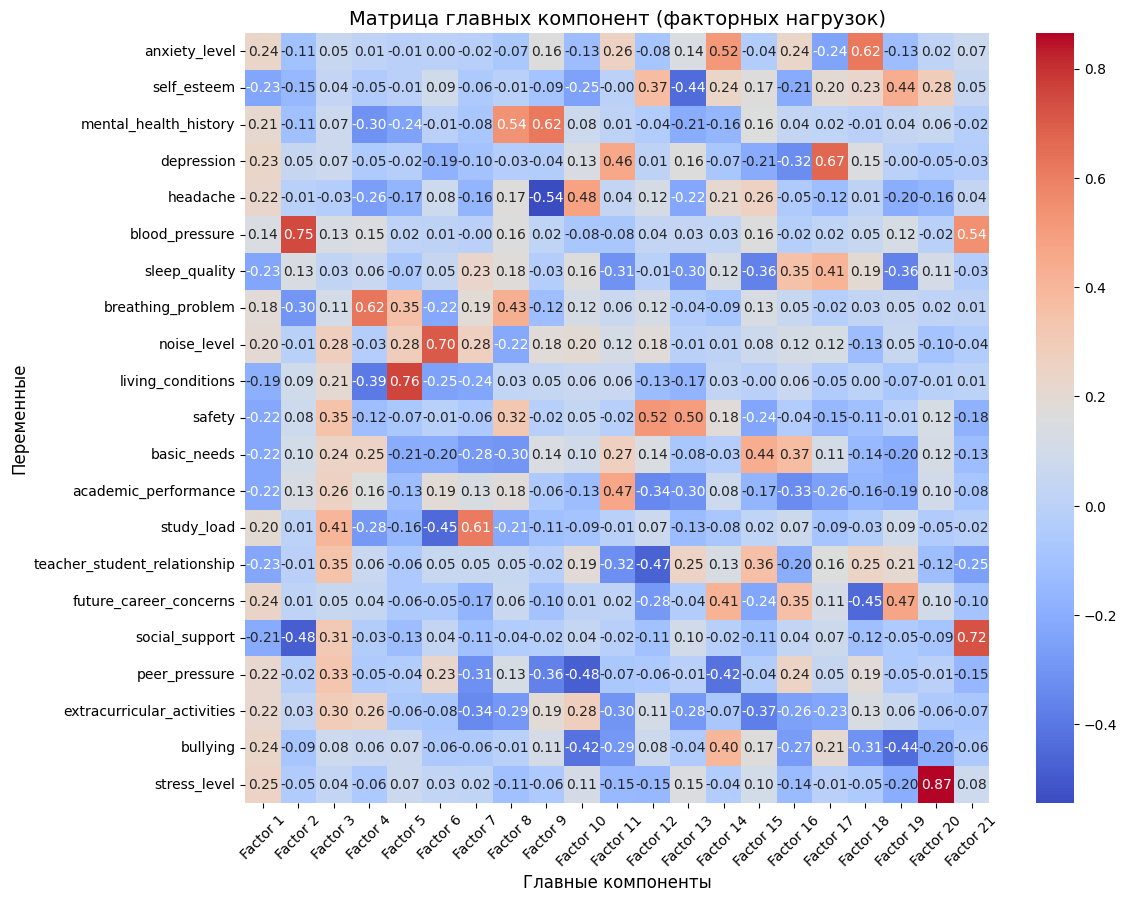

In [ ]:
# Построение тепловой карты
plt.figure(figsize=(12, 10))
sns.heatmap(factor_loadings, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# Подписи
plt.title("Матрица главных компонент (факторных нагрузок)", fontsize=14)
plt.xlabel("Главные компоненты", fontsize=12)
plt.ylabel("Переменные", fontsize=12)
plt.xticks(rotation=45)
plt.show()


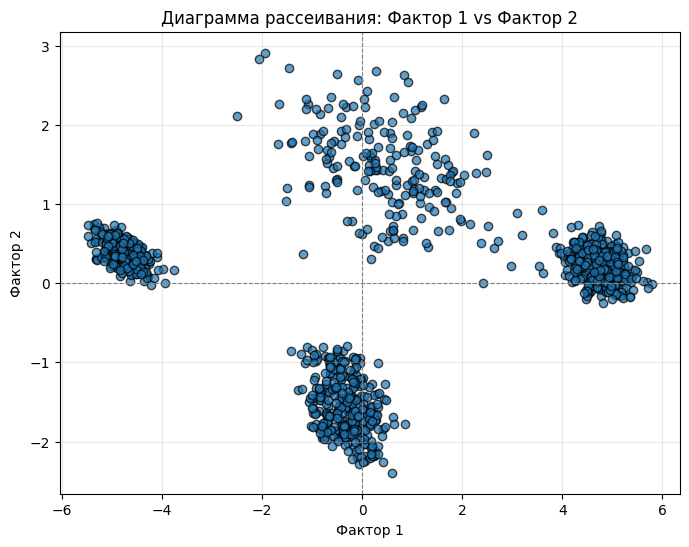

In [ ]:
import matplotlib.pyplot as plt

# Получение проекций данных на факторы (главные компоненты)
data_factors = data_pca

# Построение диаграммы рассеивания для первых двух факторов
plt.figure(figsize=(8, 6))
plt.scatter(data_factors[:, 0], data_factors[:, 1], alpha=0.7, edgecolor='k')

# Оси
plt.axhline(0, color='grey', linestyle='--', linewidth=0.8)
plt.axvline(0, color='grey', linestyle='--', linewidth=0.8)

# Подписи
plt.xlabel("Фактор 1")
plt.ylabel("Фактор 2")
plt.title("Диаграмма рассеивания: Фактор 1 vs Фактор 2")
plt.grid(alpha=0.3)
plt.show()


In [ ]:
# varimax, oblimax, quartimax, equamax, geomin_ort, promax, oblimin, quartimin, geomin_obl.
# Применение вращения (варимакс)
rotator = Rotator(method='varimax')
rotated_loadings = rotator.fit_transform(factor_loadings.values)

# Преобразуем обратно в DataFrame
rotated_factor_loadings = pd.DataFrame(
    rotated_loadings,
    columns=[f"Factor_{i+1}" for i in range(rotated_loadings.shape[1])],
    index=standart_data.columns
)

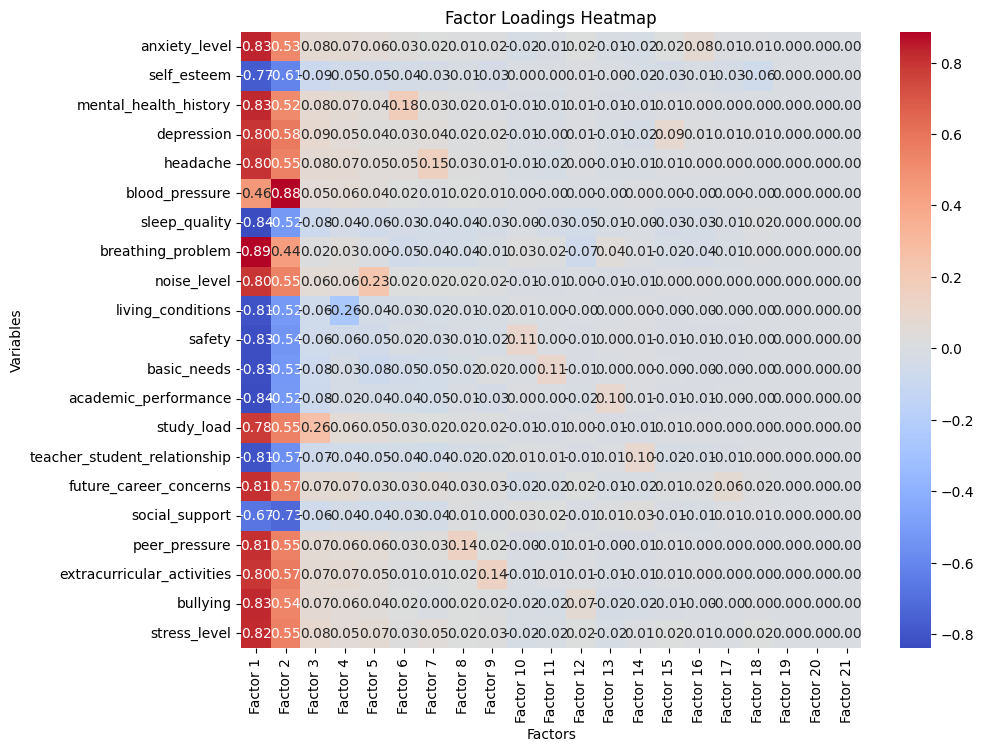

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from factor_analyzer import FactorAnalyzer
import pandas as pd

# Предположим, что correlation_matrix — это корреляционная матрица ваших данных
fa = FactorAnalyzer(n_factors=21, rotation='varimax')  # Укажите желаемое количество факторов
fa.fit(correlation_matrix)

# Получение матрицы факторных нагрузок
factor_loadings = pd.DataFrame(
    fa.loadings_,
    index=correlation_matrix.index,
    columns=[f'Factor {i+1}' for i in range(21)]
)

# Визуализация матрицы факторных нагрузок
plt.figure(figsize=(10, 8))
sns.heatmap(factor_loadings, annot=True, cmap='coolwarm', fmt=".2f", cbar=True)
plt.title('Factor Loadings Heatmap')
plt.xlabel('Factors')
plt.ylabel('Variables')
plt.show()


Factor 1:
Переменные с высокими отрицательными нагрузками: anxiety_level, mental_health_history, depression, headache, breathing_problem, future_career_concerns, peer_pressure, extracurricular_activities, bullying, stress_level
Этот фактор можно интерпретировать как отражающий психологическое состояние.

Factor 2:
Переменные с высокими нагрузками: blood_pressure
Этот фактор можно связать с физическим состоянием.




Критерий Кайзера-Мейера-Олькина (KMO)

In [ ]:
from factor_analyzer import calculate_bartlett_sphericity
chi_square_value, p_value = calculate_bartlett_sphericity(standart_data)

print(f"Chi-Square: {chi_square_value:.2f}")
print(f"P-value: {p_value}")


from factor_analyzer import calculate_kmo
kmo_all, kmo_model = calculate_kmo(standart_data)
print("KMO:", kmo_model)


Chi-Square: 19237.23
P-value: 0.0
KMO: 0.9712055827228677


In [ ]:
# # Построение тепловой карты
# plt.figure(figsize=(12, 10))
# sns.heatmap(rotated_factor_loadings, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

# # Подписи
# plt.title("Матрица главных компонент (факторных нагрузок)", fontsize=14)
# plt.xlabel("Главные компоненты", fontsize=12)
# plt.ylabel("Переменные", fontsize=12)
# plt.xticks(rotation=45)
# plt.show()

In [ ]:
# Получение собственных значений
eigenvalues = pca.explained_variance_

# 1. Критерий Кайзера: выбираем компоненты с eigenvalue > 1
kaiser_criteria = np.sum(eigenvalues > 1)
print(f"Количество факторов по критерию Кайзера: {kaiser_criteria}")

Количество факторов по критерию Кайзера: 2


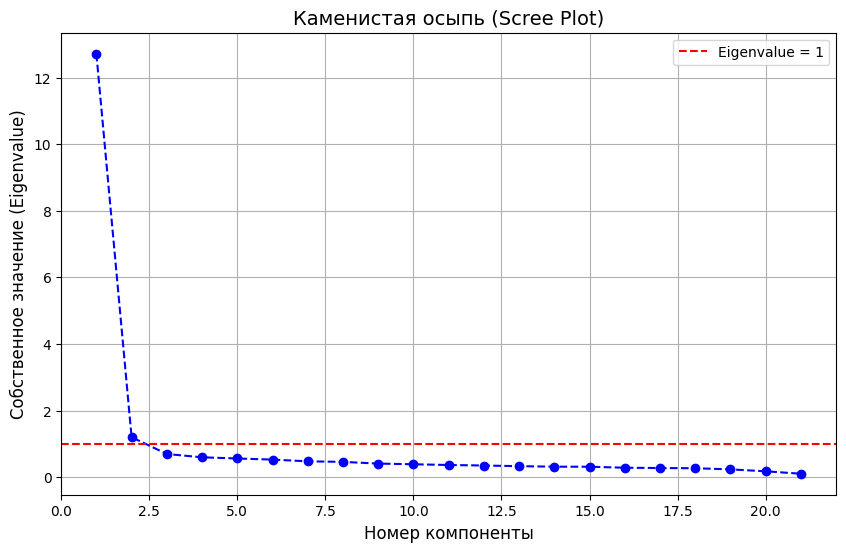

In [ ]:
# 2. Критерий каменистой осыпи (Scree Plot)
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, marker='o', linestyle='--', color='b')
plt.title('Каменистая осыпь (Scree Plot)', fontsize=14)
plt.xlabel('Номер компоненты', fontsize=12)
plt.ylabel('Собственное значение (Eigenvalue)', fontsize=12)
plt.axhline(y=1, color='r', linestyle='--', label='Eigenvalue = 1')  # Для Критерия Кайзера
plt.legend()
plt.grid()
plt.show()

На основе данного графика можно сделать предварительный вывод о том, что для данного набора данных достаточно выбрать 2 или 3 главные компоненты для дальнейшего анализа